# Part 1: classical methods

## 1. Haar Classifier

The Haar Classifier is a machine learning based approach. The algorithm is created by Paul Viola and Michael Jones based on Haar wavelets.
First, Haar features are extracted from each image as shown by the windows below:

<img src="https://www.researchgate.net/profile/Ahmad_Mosa/publication/296677256/figure/fig8/AS:335472111964171@1456994192933/Figure-23-The-14-Haar-filters-The-three-groups-of-the-Haar-Like-Features-1-Edge.png" width="350" height="250">

Each window is used to calculate a single feature. This feature is a single value obtained by subtracting the average dark-region pixel value from the average light-region pixel value. If the difference is above the threshold (set during learning), that feature is said to be present. 
By using Haar features to face detection , it can come one feature per image or ten features or even hundreds features per image, it depends on many criteria such as the structure, occlusion and skin tone of the face in an image.

<img src="https://lh6.googleusercontent.com/0di3jkTAS8DcqOdLHpaz-RP0mwUSOAZPCLy4diJBq5c4ger625RmipaEecMyy4jtUGwcV0osw2Q2cgOgatPfMlEOEMFNP2BQ-MrDadGwYhH2et65LJP8Qs83aB844Q" width="100" height="200">
<img src="https://lh6.googleusercontent.com/_knpWA0OvQ7P077l99XfyB9tyPhyrs74WmkdIg9Id0xv7TooMk7BWPf0SFZevzBodMHdxCFFzkZGaPUPEEu3cT4uOfmhmWRjNPMdeW4doTnRmzsrWn2AKhffsIRIWw" width="400" height="200">

## 2. LBP  classifier
Local Binary Patterns (LBP) is defined as a simple efficient texture operator which labels the pixels of an image by thresholding the $3\times 3$ neighbourhood of each pixel with the value of the centre pixel. For each neighbor pixel that is greater than or equal to the center pixel, it sets its value to 1, and for the others, it sets them to $0$.

<img src="https://lh6.googleusercontent.com/hEXlgFw-kuDDyKetEQ8XIpD83_jBdNAzd1n-7np_P7LjnbBPIqIlppQXKvfc7-PacTbLapOBOYOHD9I_9hZeDBqkJ-QUZM6haDvtzTctD8vbw8dts1iGDcmQGLhLag" width="650" height="150">

The center pixel = 90.

The binary number = 10001101.

The decimal number = 141.

For more detail about Haar and LBP cascades
https://www.researchgate.net/publication/308836179_A_comparative_study_between_LBP_and_Haar-like_features_for_Face_Detection_using_OpenCV

## Face detection using Haar cascades

The method of Viola and Jones, proposed by researchers Paul Viola and Michael Jones in 2001, is one of the first methods that can efficiently detect objects in an image in real time. Originally invented to detect faces, it can also be used to detect other types of objects such as cars or planes. It is a supervised learning method where a cascade function is trained from negative images and positive ones. Then, it is used to detect objects in other images.


In [4]:
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
drive.mount("/content/drive")
relevant_path = '/content/drive/My Drive/Course v2/B2. AI for Image & Natural Language Processing/B2.2 Face detection/Data/'


Mounted at /content/drive


## 1.1) Load & Display an image
Load the color image (parrot.jpg) and display it.
Now delete the axes of the image.
Load, Display and delete axes of the grayscale image (cat.jpg). Be careful, you have to set the palette to grayscale before displaying. **(plt.imshow(img, color_map):** This is a matplotlib function used to display an image. It takes two arguments; the first one is the image you want to post and the second is the colormap (gray, RGB) in which the image is in.)
Do the previous question using openCV.


(-0.5, 599.5, 399.5, -0.5)

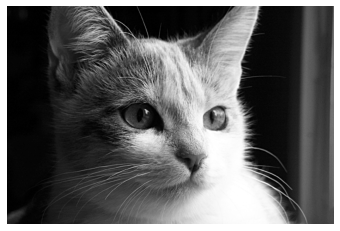

In [ ]:
im_parrot = plt.imread(relevant_path + 'parrot.jpg')
plt.axis('off')
plt.imshow(im_parrot)

im_cat = plt.imread(relevant_path + 'cat.jpg')
plt.imshow(im_cat, cmap='gray')
plt.axis('off')

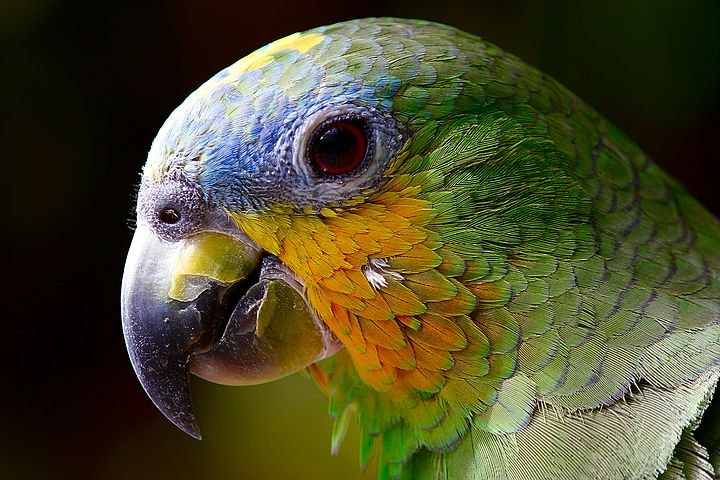

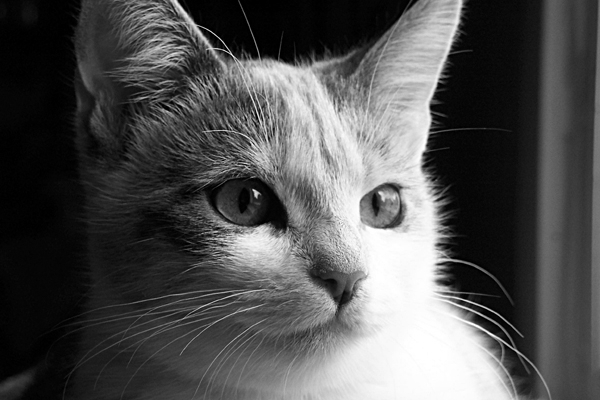

In [ ]:
from google.colab.patches import cv2_imshow

im_parrot2 = cv2.imread(relevant_path + 'parrot.jpg')
cv2_imshow(im_parrot2)
#cv2.waitKey(2000) #image will not show until this is called, wait 2s

im_cat2 = cv2.imread(relevant_path + 'cat.jpg')
cv2_imshow(im_cat2)
#cv2.waitKey(2000) #image will not show until this is called

## 1.2) load and display test image
Load image (baby.jpg), convert this image to grayscale mode (opencv face detector expects gray images) and display it. 

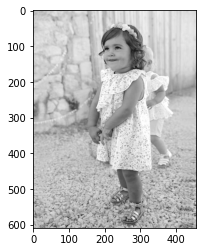

In [ ]:
im_baby = cv2.imread(relevant_path + 'baby.jpg')
im_baby_gray = cv2.cvtColor(im_baby, cv2.COLOR_BGR2GRAY)

#cv2.imshow('baby', im_baby_gray)
#cv2.waitKey(2000) #image will not show until this is called, wait 2s
#cv2.destroyWindow('baby') #make sure window closes cleanly

plt.imshow(im_baby_gray, cmap='gray')


## 1.3) Load Haar cascade classifier
Load Haar cascade classifier (Violat-Jones classifier). To do this you have to use the OpenCV class “cv2.CascadeClassifier”. It takes as input the training file of the Haar classifier we want to load and loads it for us. This training file is stored in the folder where you installed the OpenCV library. If you did not get the pre-trained classifier, you can obtain it from the Image processing folder of the Github. 

Detect faces using the OpenCV’s CascadeClassifier function “detect MultiScale”; It is a general function to detect objects, it detect faces (since we called in the face cascade) and when it finds a face, it returns a list of positions of this face in the form “Rect(x,y,w,h)” otherwise it returns “None”. In this case, you will use only this three parameters of the function “detect MultiScale” (image: grayscale image, scaleFactor: Parameter that compensates a false perception in size that occurs when one face appears to be bigger than the other simply because it is closer to the camera , minNeighbors: Parameter specifying how many neighbors each candidate rectangle should have to retain it)

Print the number of faces. In this case, it should be 1. If you want you can also print the coordinates of the position (of the rectangle).


In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml -P '/content/drive/My Drive/Course v2/B2. AI for Image & Natural Language Processing/B2.2 Face detection/Data/'
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml -P '/content/drive/My Drive/Course v2/B2. AI for Image & Natural Language Processing/B2.2 Face detection/Data/'

--2020-09-11 13:26:28--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341406 (333K) [text/plain]
Saving to: ‘/content/drive/My Drive/Course v2/B2. AI for Image & Natural Language Processing/B2.2 Face detection/Data/haarcascade_eye.xml.8’

haarcascade_eye.xml 100%[===================>] 333.40K  --.-KB/s    in 0.05s   

2020-09-11 13:26:28 (7.10 MB/s) - ‘/content/drive/My Drive/Course v2/B2. AI for Image & Natural Language Processing/B2.2 Face detection/Data/haarcascade_eye.xml.8’ saved [341406/341406]

--2020-09-11 13:26:28--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com 

In [ ]:
cascades_path = relevant_path
face_cascade = cv2.CascadeClassifier(cascades_path + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(im_baby_gray, scaleFactor=1.1, minNeighbors=3)
print('The number of faces is: {}\nThe coordiates:'.format(faces.shape[0]), faces[:])

The number of faces is: 1
The coordiates: [[179  72  88  88]]


## 1.4) Draw rectangle over face
Next, go over the list of faces (rectangles) and draw those rectangles on original colored image to see if detected faces are real ones and not any false positives. You have to use the OpenCV function " rectangle ".


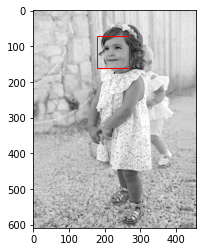

In [ ]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()
for coors in faces:
    ax.add_patch(Rectangle(coors[:2], width=coors[2], height=coors[3], color='red', fill=False))
    
ax.imshow(im_baby_gray, cmap='gray')


## 1.5) Write function to detect face
Try the previous code using (twins.jpg) and (family.jpg) images. Interpret the result. You can also use image of your choice.
Turn the previous code into a function “ HAAR_faces_detect” that can be reusable later.


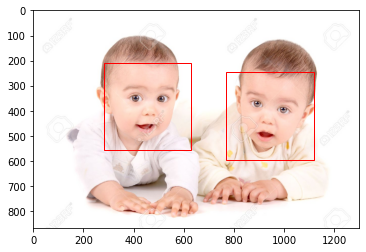

In [ ]:
import matplotlib.pyplot as plt
import cv2
from matplotlib.patches import Rectangle

class class_face_cascade:
    def __init__(self):
        face_cascade = cv2.CascadeClassifier(cascades_path + 'haarcascade_frontalface_default.xml')
    
    def detect_n_plot(self, im_path, scaleFactor=1.05, minNeighbors=3):
        im = cv2.imread(im_path)
        im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(im_gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors)
        
        fig, ax = plt.subplots()
        for coors in faces:
            ax.add_patch(Rectangle(coors[:2], width=coors[2], height=coors[3], color='red', fill=False))
        ax.imshow(im[:,:,[2,1,0]])
    

#class_face_cascade().detect_n_plot(relevant_path + 'family.jpg')
class_face_cascade().detect_n_plot(relevant_path + 'twins.jpg', 1.1, 3)


## 1.6) Improve result
In addition to Haar classifier, OpenCV provides us with LBP; pre-trained and ready to be used classifier for face detection.
Change your code (question 5) to use the LBP cascade classifier.



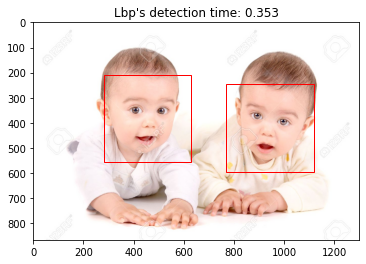

In [ ]:
import time

class class_face_cascade:
    def __init__(self, lbp=False):
        if lbp:
            self.method = 'Lbp'
            face_cascade = cv2.CascadeClassifier("lbp_frontalface.xml")
        else:
            self.method = 'Haar'
            face_cascade = cv2.CascadeClassifier(cascades_path + 'haarcascade_frontalface_default.xml')
    
    def detect_n_plot(self, im_path, scaleFactor=1.1, minNeighbors=3):
        im = cv2.imread(im_path)
        im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        
        t1 = time.time()
        faces = face_cascade.detectMultiScale(im_gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors)
        t2 = time.time()
        
        fig, ax = plt.subplots()
        for coors in faces:
            ax.add_patch(Rectangle(coors[:2], width=coors[2], height=coors[3], color='red', fill=False))
        ax.imshow(im[:,:,[2,1,0]])
        plt.title(self.method + "'s detection time: {:.3f}".format(t2-t1))

object_face_cascade = class_face_cascade(lbp=True)
object_face_cascade.detect_n_plot(relevant_path + 'twins.jpg')

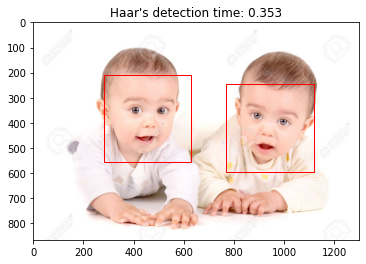

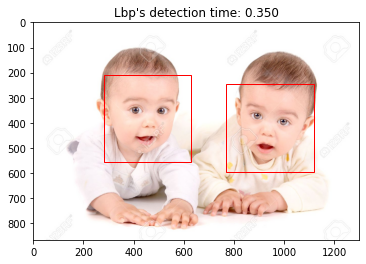

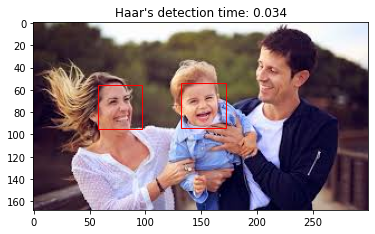

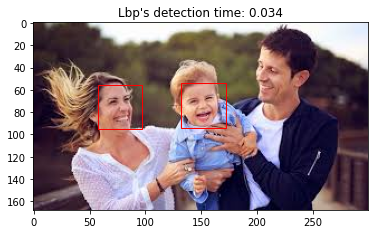

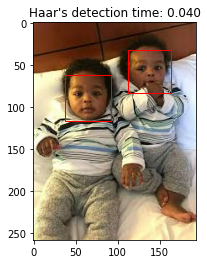

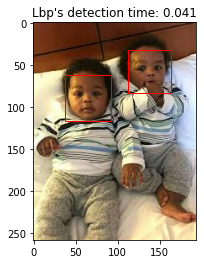

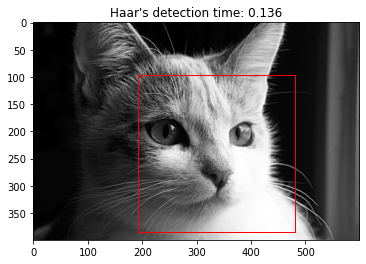

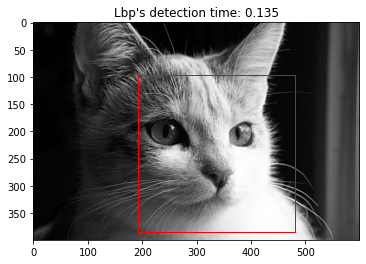

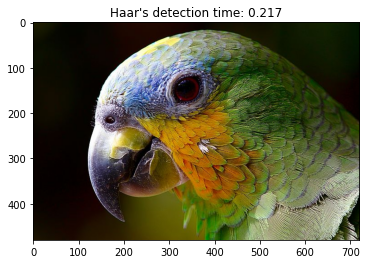

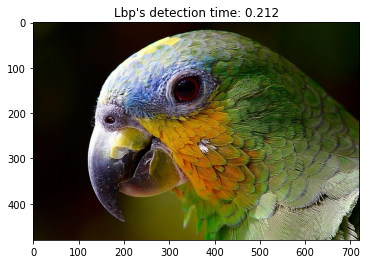

In [ ]:
lbp = class_face_cascade(lbp=True)
haar = class_face_cascade()

for im_path in [relevant_path + 'twins.jpg', relevant_path + 'family.jpg', relevant_path + 'twins2.jpg', relevant_path + 'cat.jpg', relevant_path +  'parrot.jpg']:
    
    haar.detect_n_plot(im_path)
    lbp.detect_n_plot(im_path)

# PART 2

Haars filters is very classical, however is quite old method. The more current and state-of-the-art Multi-Task Cascaded Convolutional Neural Network, or MTCNN are used for face detection. We are also going to use FaceNet model for face recognizion - for distinguish one person from another.

## 2.1) Installation of libraries
Install the libraries, using the following commands.

In [5]:
import warnings
warnings.filterwarnings('ignore')

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1' -O facenet_keras.h5
from keras.models import load_model
model = load_model('facenet_keras.h5')
!sudo pip install mtcnn

print(model.inputs)
print(model.outputs)

--2020-09-14 15:05:03--  https://docs.google.com/uc?export=download&id=1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1
Resolving docs.google.com (docs.google.com)... 74.125.195.101, 74.125.195.139, 74.125.195.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-4s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/si5tmc2m32g3uv8jchjmpdgenofg4rgj/1600095900000/09379222848295305915/*/1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1?e=download [following]
--2020-09-14 15:05:06--  https://doc-04-4s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/si5tmc2m32g3uv8jchjmpdgenofg4rgj/1600095900000/09379222848295305915/*/1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1?e=download
Resolving doc-04-4s-docs.googleusercontent.com (doc-04-4s-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to doc-04-4s-docs.googleusercontent.com (doc-04-4s-d

## 2.2) Load test image.
Convert it to RGB using PIL library and then transform it to assarray.
We need to convert image to RGB, because by definition PIL library uses BGR colour scheme.

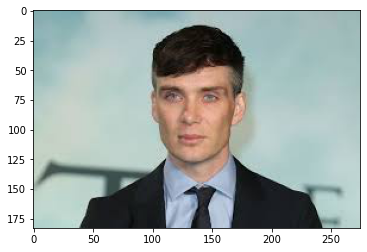

In [6]:
from PIL import Image
from numpy import asarray
from google.colab.patches import cv2_imshow

filename = relevant_path + 'Murphy.jpg'
image = Image.open(filename)
image = image.convert('RGB')
pixels = asarray(image)
plt.imshow(pixels)

In [7]:
pixels

array([[[130, 170, 172],
        [131, 171, 173],
        [131, 171, 173],
        ...,
        [153, 182, 180],
        [153, 182, 180],
        [153, 182, 180]],

       [[131, 171, 173],
        [131, 171, 173],
        [131, 171, 173],
        ...,
        [153, 182, 180],
        [153, 182, 180],
        [153, 182, 180]],

       [[131, 171, 173],
        [131, 171, 173],
        [131, 171, 173],
        ...,
        [153, 182, 180],
        [153, 182, 180],
        [153, 182, 180]],

       ...,

       [[178, 210, 205],
        [178, 210, 205],
        [178, 210, 205],
        ...,
        [186, 211, 205],
        [186, 211, 205],
        [186, 211, 205]],

       [[177, 209, 204],
        [177, 209, 204],
        [177, 209, 204],
        ...,
        [186, 211, 205],
        [186, 211, 205],
        [186, 211, 205]],

       [[177, 209, 204],
        [177, 209, 204],
        [177, 209, 204],
        ...,
        [185, 210, 204],
        [185, 210, 204],
        [185, 210, 204]]

## 2.3) Apply MTCNN() detector 
Apply MTCNN detector for test image and print the result.

In [8]:
from mtcnn.mtcnn import MTCNN
detector = MTCNN()
results = detector.detect_faces(pixels)
print(results)

[{'box': [103, 48, 62, 79], 'confidence': 0.999896764755249, 'keypoints': {'left_eye': (117, 72), 'right_eye': (148, 72), 'nose': (131, 91), 'mouth_left': (121, 106), 'mouth_right': (145, 107)}}]


## 2.4) Extract the face
Create a new image, which contains ONLY face, resize it to $160 \times 160$ pixels and show it. Make sure, that it is really the face and not some other part!

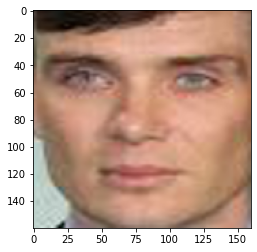

In [9]:
import matplotlib.pyplot as plt
x1, y1, width, height = results[0]['box']
x2, y2 = x1 + width, y1 + height
face = pixels[y1:y2, x1:x2]
image = Image.fromarray(face)
image = image.resize((160, 160))
face_array = asarray(image)
plt.imshow(face_array)

## 2.5) Five celebrities dataset
We are going to work with five celebrities dataset from kaggle: https://www.kaggle.com/dansbecker/5-celebrity-faces-dataset. Download it and unzip it to your working directory.

In [10]:
import zipfile
zip_ref = zipfile.ZipFile(relevant_path + '5-celebrity-faces-dataset.zip', 'r')
zip_ref.extractall(relevant_path)
zip_ref.close()

## 2.6) Print all resized Ben Affleck images.
Create `extract_face` function which extracts $160\times 160$ pixels image of face from photo. Use `listdir()` function to look though all the subfolders of folder. Show all the faces of Ben Afflec.

In [ ]:
from os import listdir

def extract_face(filename, required_size=(160, 160)):
	image = Image.open(filename)
	image = image.convert('RGB')   #BGR originally
	pixels = asarray(image)
	detector = MTCNN()
	results = detector.detect_faces(pixels)
	x1, y1, width, height = results[0]['box']
	#x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	face = pixels[y1:y2, x1:x2]
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

folder = relevant_path + 'train/ben_afflek/'
i = 1
# enumerate files
for filename in listdir(folder):
	path = folder + filename
	face = extract_face(path)
	print(i, face.shape)
	plt.subplot(3, 5, i)
	plt.axis('off')
	plt.imshow(face)
	i += 1
plt.show()

## 2.7) Write `upload_faces` function.
It should return list of faces given directory name - use `.append()` to add new element to list. This is generalization of `extract_face()` function

In [17]:
def load_faces(directory):
	faces = list()
	for filename in listdir(directory):
		path = directory + filename
		face = extract_face(path)
		faces.append(face)
	return faces

In [18]:
lst = load_faces(relevant_path + 'train/ben_afflek/')

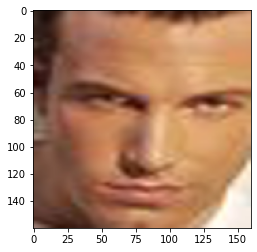

In [22]:
plt.imshow(lst[3])

## 2.8) Write `load_dataset` function.
This function is used to upload dataset (train or validation): it is generalization of the previous function, which was used only for one person.

In [ ]:
from os.path import isdir

def load_dataset(directory):
	X, y = list(), list()
	# enumerate folders, on per class
	for subdir in listdir(directory):
		# path
		path = directory + subdir + '/'
		# skip any files that might be in the dir
		if not isdir(path):
			continue
		# load all faces in the subdirectory
		faces = load_faces(path)
		# create labels
		labels = [subdir for _ in range(len(faces))]
		# summarize progress
		print('>loaded %d examples for class: %s' % (len(faces), subdir))
		# store
		X.extend(faces)
		y.extend(labels)
	return asarray(X), asarray(y)

## 2.9) Extract faces and save data.
As your probably noticed, the previous step can take some time to finish. It will be pity if you data is lost.
Use `savez_compressed()` function from numpy to save your new dataset of $160\times 160$ faces to the disk.

In [ ]:
from numpy import savez_compressed

trainX, trainy = load_dataset(relevant_path + 'train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset(relevant_path + 'val/')
print(testX.shape, testy.shape)
# save arrays to one file in compressed format
savez_compressed(relevant_path + '5-celebrity-faces-dataset.npz', trainX, trainy, testX, testy)

>loaded 14 examples for class: ben_afflek
>loaded 17 examples for class: elton_john
>loaded 21 examples for class: jerry_seinfeld
>loaded 19 examples for class: madonna
>loaded 22 examples for class: mindy_kaling
(93, 160, 160, 3) (93,)
>loaded 5 examples for class: ben_afflek
>loaded 5 examples for class: elton_john
>loaded 5 examples for class: jerry_seinfeld
>loaded 5 examples for class: madonna
>loaded 5 examples for class: mindy_kaling
(25, 160, 160, 3) (25,)


## 2.10) Load saved data
If you saved your data in previous step, it is now time to load it.
Load your saved preprocessed dataset and **FaceNet** pretrained model.

In [ ]:
from numpy import load
data = load(relevant_path + '5-celebrity-faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))

model = load_model('facenet_keras.h5')
print('Loaded Model')
print(model.inputs)
print(model.outputs)

Dataset: train=93, test=25
Loaded Model
[<tf.Tensor 'input_1_3:0' shape=(?, 160, 160, 3) dtype=float32>]
[<tf.Tensor 'Bottleneck_BatchNorm_2/cond/Merge:0' shape=(?, 128) dtype=float32>]


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


## 2.11) Extract features, using FaceNet
Facenet can extract usefull features of the image: it is like dimension reduction technique here: we have input $160 \times 160$ picture and the result will by $128$ features - the last layer of neural network. We can use these features latere with different techniques. Create function get_features to extract features: do not forget to normalize your data before - it is neural networs and it works much better with normalization. Also merge all your data into one big tensor.

In [ ]:
from numpy import expand_dims

def get_features(model, face_pixels):
  face_pixels = face_pixels.astype('float32')
  mean, std = face_pixels.mean(), face_pixels.std()
  face_pixels = (face_pixels - mean) / std
  samples = expand_dims(face_pixels, axis=0)
  #print(samples.shape())
  yhat = model.predict(samples)
  return yhat[0]

## 2.12) Convert train and test datasets into features
Now apply function `get_features()` both for train and test datasets, save the results to the file on your google drive.

In [ ]:
newTrainX = list()
for face_pixels in trainX:
	features = get_features(model, face_pixels)
	newTrainX.append(features)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)

newTestX = list()
for face_pixels in testX:
	features = get_features(model, face_pixels)
	newTestX.append(features)
newTestX = asarray(newTestX)
print(newTestX.shape)

savez_compressed(relevant_path + '5-celebrity-faces-features.npz', newTrainX, trainy, newTestX, testy)

(93, 128)
(25, 128)


## 2.13) Load saved features
If you saved your data in previous step, it is now time to load it. Load your features from the file

In [ ]:
data = load(relevant_path + '5-celebrity-faces-features.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))

Dataset: train=93, test=25


## 2.14) Normalize your features.
Use $\ell_2$ norm and use encoding for the labels - you can choose one-hot encoder or just convert to integers.

In [ ]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder

in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)

out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)

## 2.15) Make preidctions.
Use SVM, print accuracy and confusion matrix. Do you have good results? Why?

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

model_svm = SVC(kernel='linear')
model_svm.fit(trainX, trainy)

yhat_train = model_svm.predict(trainX)
yhat_test = model_svm.predict(testX)

score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)

print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Accuracy: train=100.000, test=100.000


## 2.16) **Extra**: try it with bigger dataset
For example choose several celebrities, go to google and download a bunch of images. Choose some not very good images on purpose, trying to break the model. Use K-means insead of SVM to make predictions